In [262]:
import numpy as np
import pandas as pd 

import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px 
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'



from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from xgboost.sklearn import XGBRegressor
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, accuracy_score
from sklearn.metrics import max_error, r2_score, mean_absolute_error, mean_absolute_percentage_error

from sklearn.model_selection import GridSearchCV

In [263]:
df= pd.read_csv('Data/main.csv')
df

,DATE,CSUSHPISA,MPRIME,CPIAUCSL,CSCICP03USM665S,USALORSGPNOSTSAM,T10YIEM,PI,POPTHM,DSPIC96,SPASTT01USM657N,UNRATE
0,1/1/2003,128.460,4.25,182.600,99.547162,98.340277,1.76,9297.2,289412.0,10133.6,-0.368127,5.8
1,2/1/2003,129.355,4.25,183.600,99.386673,98.332993,1.91,9302.0,289606.0,10097.6,-6.280696,5.9
2,3/1/2003,130.147,4.25,183.900,99.470983,98.371757,1.87,9341.7,289809.0,10121.5,-0.293998,5.9
3,4/1/2003,130.884,4.25,183.200,99.911101,98.457636,1.78,9369.8,290024.0,10181.4,5.388649,6.0
4,5/1/2003,131.734,4.25,182.900,100.345019,98.588511,1.66,9431.9,290250.0,10261.2,5.865718,6.1
...,...,...,...,...,...,...,...,...,...,...,...,...
243,4/1/2023,300.214,8.00,302.918,97.183635,100.047133,2.27,22669.7,334880.0,15633.0,2.863582,3.4
244,5/1/2023,302.657,8.23,303.294,97.177669,100.062858,2.21,22761.5,335013.0,15697.7,-1.785977,3.7
245,6/1/2023,304.635,8.25,303.841,97.489157,NaN,2.20,22822.8,335163.0,15701.3,2.280162,3.6
246,NaN,NaN,8.29,304.348,97.950268,NaN,2.30,22867.8,335329.0,15673.5,3.372091,3.5


In [264]:
main_df = df.copy()
main_df

,DATE,CSUSHPISA,MPRIME,CPIAUCSL,CSCICP03USM665S,USALORSGPNOSTSAM,T10YIEM,PI,POPTHM,DSPIC96,SPASTT01USM657N,UNRATE
0,1/1/2003,128.460,4.25,182.600,99.547162,98.340277,1.76,9297.2,289412.0,10133.6,-0.368127,5.8
1,2/1/2003,129.355,4.25,183.600,99.386673,98.332993,1.91,9302.0,289606.0,10097.6,-6.280696,5.9
2,3/1/2003,130.147,4.25,183.900,99.470983,98.371757,1.87,9341.7,289809.0,10121.5,-0.293998,5.9
3,4/1/2003,130.884,4.25,183.200,99.911101,98.457636,1.78,9369.8,290024.0,10181.4,5.388649,6.0
4,5/1/2003,131.734,4.25,182.900,100.345019,98.588511,1.66,9431.9,290250.0,10261.2,5.865718,6.1
...,...,...,...,...,...,...,...,...,...,...,...,...
243,4/1/2023,300.214,8.00,302.918,97.183635,100.047133,2.27,22669.7,334880.0,15633.0,2.863582,3.4
244,5/1/2023,302.657,8.23,303.294,97.177669,100.062858,2.21,22761.5,335013.0,15697.7,-1.785977,3.7
245,6/1/2023,304.635,8.25,303.841,97.489157,NaN,2.20,22822.8,335163.0,15701.3,2.280162,3.6
246,NaN,NaN,8.29,304.348,97.950268,NaN,2.30,22867.8,335329.0,15673.5,3.372091,3.5


In [265]:
main_df.dropna(inplace=True)

In [266]:
main_df['DATE'] = pd.to_datetime(main_df['DATE'])

main_df['YEAR'] = main_df['DATE'].dt.year
main_df['MONTH'] = main_df['DATE'].dt.month
main_df['QUARTER'] = main_df['DATE'].dt.quarter

main_df

,DATE,CSUSHPISA,MPRIME,CPIAUCSL,CSCICP03USM665S,USALORSGPNOSTSAM,T10YIEM,PI,POPTHM,DSPIC96,SPASTT01USM657N,UNRATE,YEAR,MONTH,QUARTER
0,2003-01-01,128.460,4.25,182.600,99.547162,98.340277,1.76,9297.2,289412.0,10133.6,-0.368127,5.8,2003,1,1
1,2003-02-01,129.355,4.25,183.600,99.386673,98.332993,1.91,9302.0,289606.0,10097.6,-6.280696,5.9,2003,2,1
2,2003-03-01,130.147,4.25,183.900,99.470983,98.371757,1.87,9341.7,289809.0,10121.5,-0.293998,5.9,2003,3,1
3,2003-04-01,130.884,4.25,183.200,99.911101,98.457636,1.78,9369.8,290024.0,10181.4,5.388649,6.0,2003,4,2
4,2003-05-01,131.734,4.25,182.900,100.345019,98.588511,1.66,9431.9,290250.0,10261.2,5.865718,6.1,2003,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,2023-01-01,296.601,7.50,300.536,97.299665,99.994540,2.24,22432.0,334533.0,15504.7,2.671263,3.4,2023,1,1
241,2023-02-01,296.958,7.74,301.648,97.414405,100.014996,2.33,22520.6,334637.0,15545.3,0.830646,3.6,2023,2,1
242,2023-03-01,298.210,7.82,301.808,97.292142,100.031746,2.30,22605.1,334753.0,15598.6,-4.792700,3.5,2023,3,1
243,2023-04-01,300.214,8.00,302.918,97.183635,100.047133,2.27,22669.7,334880.0,15633.0,2.863582,3.4,2023,4,2


In [267]:
col_name = {
    'MPRIME':'BANKLOAN_RATE',
    'CPIAUCSL':'CONSUMER_PRICE_INDEX',
    'CSCICP03USM665S':'CONSUMER_SENTIMENT_INDEX',
    'USALORSGPNOSTSAM':'GDP',
    'T10YIEM':'INFLATION_RATE',
    'PI':'PERSONAL_INCOME',
    'POPTHM':'POPULATION',
    'DSPIC96':'REAL_DISPOSABLE_PERSONAL_INCOME',
    'SPASTT01USM657N':'TOTAL_SHARE_PRICE',
    'UNRATE':'UNEMPLOYMENT_RATE',
    'CSUSHPISA':'HOUSE_PRICE_INDEX'
}

main_df.rename(columns= col_name, inplace=True)

main_df

,DATE,HOUSE_PRICE_INDEX,BANKLOAN_RATE,CONSUMER_PRICE_INDEX,CONSUMER_SENTIMENT_INDEX,GDP,INFLATION_RATE,PERSONAL_INCOME,POPULATION,REAL_DISPOSABLE_PERSONAL_INCOME,TOTAL_SHARE_PRICE,UNEMPLOYMENT_RATE,YEAR,MONTH,QUARTER
0,2003-01-01,128.460,4.25,182.600,99.547162,98.340277,1.76,9297.2,289412.0,10133.6,-0.368127,5.8,2003,1,1
1,2003-02-01,129.355,4.25,183.600,99.386673,98.332993,1.91,9302.0,289606.0,10097.6,-6.280696,5.9,2003,2,1
2,2003-03-01,130.147,4.25,183.900,99.470983,98.371757,1.87,9341.7,289809.0,10121.5,-0.293998,5.9,2003,3,1
3,2003-04-01,130.884,4.25,183.200,99.911101,98.457636,1.78,9369.8,290024.0,10181.4,5.388649,6.0,2003,4,2
4,2003-05-01,131.734,4.25,182.900,100.345019,98.588511,1.66,9431.9,290250.0,10261.2,5.865718,6.1,2003,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,2023-01-01,296.601,7.50,300.536,97.299665,99.994540,2.24,22432.0,334533.0,15504.7,2.671263,3.4,2023,1,1
241,2023-02-01,296.958,7.74,301.648,97.414405,100.014996,2.33,22520.6,334637.0,15545.3,0.830646,3.6,2023,2,1
242,2023-03-01,298.210,7.82,301.808,97.292142,100.031746,2.30,22605.1,334753.0,15598.6,-4.792700,3.5,2023,3,1
243,2023-04-01,300.214,8.00,302.918,97.183635,100.047133,2.27,22669.7,334880.0,15633.0,2.863582,3.4,2023,4,2


In [268]:
main_df['POPULATION'] = main_df['POPULATION'] * 1000
main_df['POPULATION']

0      289412000.0
1      289606000.0
2      289809000.0
3      290024000.0
4      290250000.0
          ...     
240    334533000.0
241    334637000.0
242    334753000.0
243    334880000.0
244    335013000.0
Name: POPULATION, Length: 245, dtype: float64

In [269]:
main_df.columns

main_df = main_df[[
     'DATE','YEAR', 'MONTH', 'QUARTER', 'HOUSE_PRICE_INDEX',
    'BANKLOAN_RATE', 'CONSUMER_PRICE_INDEX', 'CONSUMER_SENTIMENT_INDEX',
    'GDP', 'INFLATION_RATE', 'PERSONAL_INCOME', 'POPULATION',
    'REAL_DISPOSABLE_PERSONAL_INCOME', 'TOTAL_SHARE_PRICE',
    'UNEMPLOYMENT_RATE'
]]

main_df


,DATE,YEAR,MONTH,QUARTER,HOUSE_PRICE_INDEX,BANKLOAN_RATE,CONSUMER_PRICE_INDEX,CONSUMER_SENTIMENT_INDEX,GDP,INFLATION_RATE,PERSONAL_INCOME,POPULATION,REAL_DISPOSABLE_PERSONAL_INCOME,TOTAL_SHARE_PRICE,UNEMPLOYMENT_RATE
0,2003-01-01,2003,1,1,128.460,4.25,182.600,99.547162,98.340277,1.76,9297.2,289412000.0,10133.6,-0.368127,5.8
1,2003-02-01,2003,2,1,129.355,4.25,183.600,99.386673,98.332993,1.91,9302.0,289606000.0,10097.6,-6.280696,5.9
2,2003-03-01,2003,3,1,130.147,4.25,183.900,99.470983,98.371757,1.87,9341.7,289809000.0,10121.5,-0.293998,5.9
3,2003-04-01,2003,4,2,130.884,4.25,183.200,99.911101,98.457636,1.78,9369.8,290024000.0,10181.4,5.388649,6.0
4,2003-05-01,2003,5,2,131.734,4.25,182.900,100.345019,98.588511,1.66,9431.9,290250000.0,10261.2,5.865718,6.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,2023-01-01,2023,1,1,296.601,7.50,300.536,97.299665,99.994540,2.24,22432.0,334533000.0,15504.7,2.671263,3.4
241,2023-02-01,2023,2,1,296.958,7.74,301.648,97.414405,100.014996,2.33,22520.6,334637000.0,15545.3,0.830646,3.6
242,2023-03-01,2023,3,1,298.210,7.82,301.808,97.292142,100.031746,2.30,22605.1,334753000.0,15598.6,-4.792700,3.5
243,2023-04-01,2023,4,2,300.214,8.00,302.918,97.183635,100.047133,2.27,22669.7,334880000.0,15633.0,2.863582,3.4


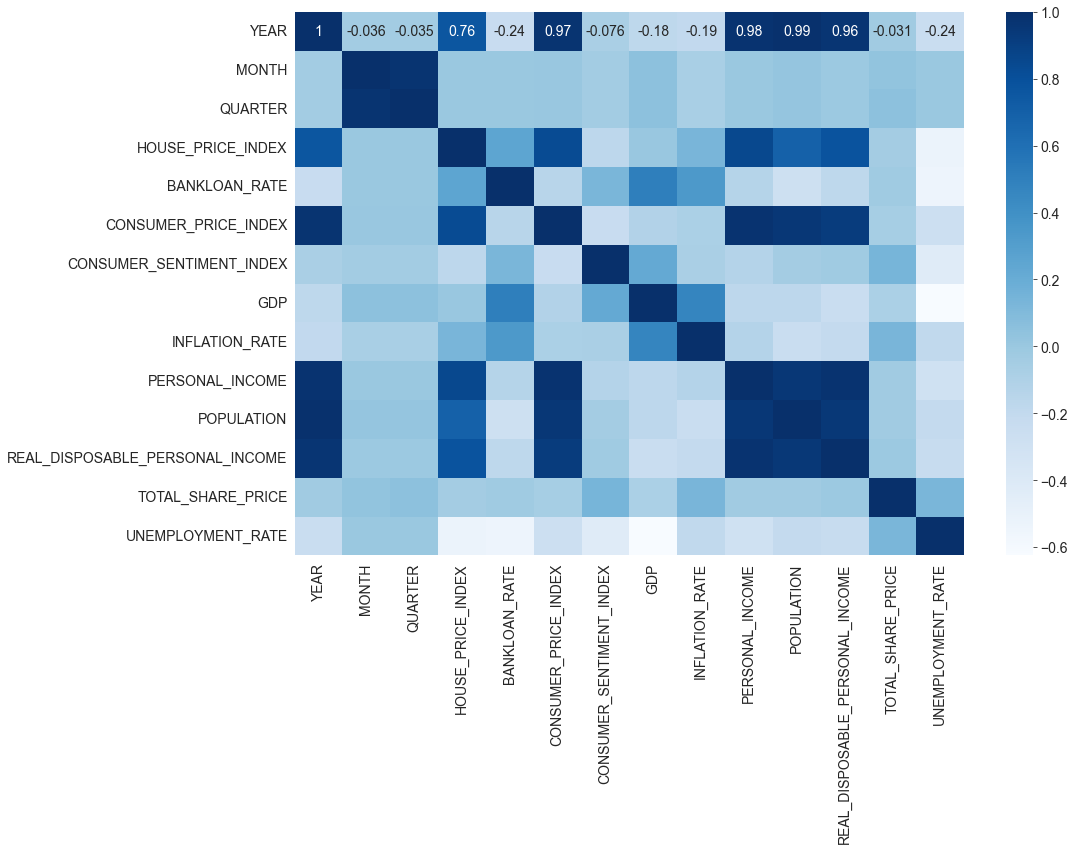

In [270]:
# Correlation Heatmap
ax = main_df.corr()

plt.figure(figsize=(15,10))
sns.heatmap(ax, cmap='Blues', annot=True);

In [271]:
# Correlation with House Price Index in Descending Order
main_df.corr()['HOUSE_PRICE_INDEX'].sort_values(ascending=False)

HOUSE_PRICE_INDEX                  1.000000
PERSONAL_INCOME                    0.853586
CONSUMER_PRICE_INDEX               0.829107
REAL_DISPOSABLE_PERSONAL_INCOME    0.781638
YEAR                               0.758989
POPULATION                         0.691565
BANKLOAN_RATE                      0.252750
INFLATION_RATE                     0.132472
GDP                                0.006043
QUARTER                           -0.001017
MONTH                             -0.001117
TOTAL_SHARE_PRICE                 -0.045432
CONSUMER_SENTIMENT_INDEX          -0.170706
UNEMPLOYMENT_RATE                 -0.526346
Name: HOUSE_PRICE_INDEX, dtype: float64

# Exploratory Analysis

In [272]:
# Getting a statistical summary of the entire dataset

main_df.describe()

,YEAR,MONTH,QUARTER,HOUSE_PRICE_INDEX,BANKLOAN_RATE,CONSUMER_PRICE_INDEX,CONSUMER_SENTIMENT_INDEX,GDP,INFLATION_RATE,PERSONAL_INCOME,POPULATION,REAL_DISPOSABLE_PERSONAL_INCOME,TOTAL_SHARE_PRICE,UNEMPLOYMENT_RATE
count,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,2.450000e+02,245.000000,245.000000,245.000000
mean,2012.714286,6.428571,2.477551,183.073392,4.468041,231.492861,99.523781,99.867650,2.077061,14911.489796,3.152250e+08,12888.893469,0.527024,5.961224
std,5.909148,3.465285,1.121925,44.139704,1.598886,29.043764,1.487675,1.251985,0.406892,3718.275791,1.386813e+07,1761.414030,3.847808,2.043965
min,2003.000000,1.000000,1.000000,128.460000,3.250000,182.600000,96.127711,91.633777,0.250000,9297.200000,2.894120e+08,10097.600000,-22.486667,3.400000
25%,2008.000000,3.000000,1.000000,148.185000,3.250000,211.933000,98.487128,99.642003,1.820000,12050.900000,3.034940e+08,11531.500000,-1.125940,4.500000
50%,2013.000000,6.000000,2.000000,173.132000,3.750000,231.893000,99.659517,99.967720,2.160000,14168.400000,3.163570e+08,12431.100000,1.054672,5.400000
75%,2018.000000,9.000000,3.000000,200.655000,5.150000,250.227000,100.890245,100.454269,2.360000,17472.700000,3.283640e+08,14275.900000,2.670338,7.300000
max,2023.000000,12.000000,4.000000,304.817000,8.250000,303.294000,101.640872,101.861821,2.880000,24371.900000,3.350130e+08,19213.900000,12.667415,14.700000


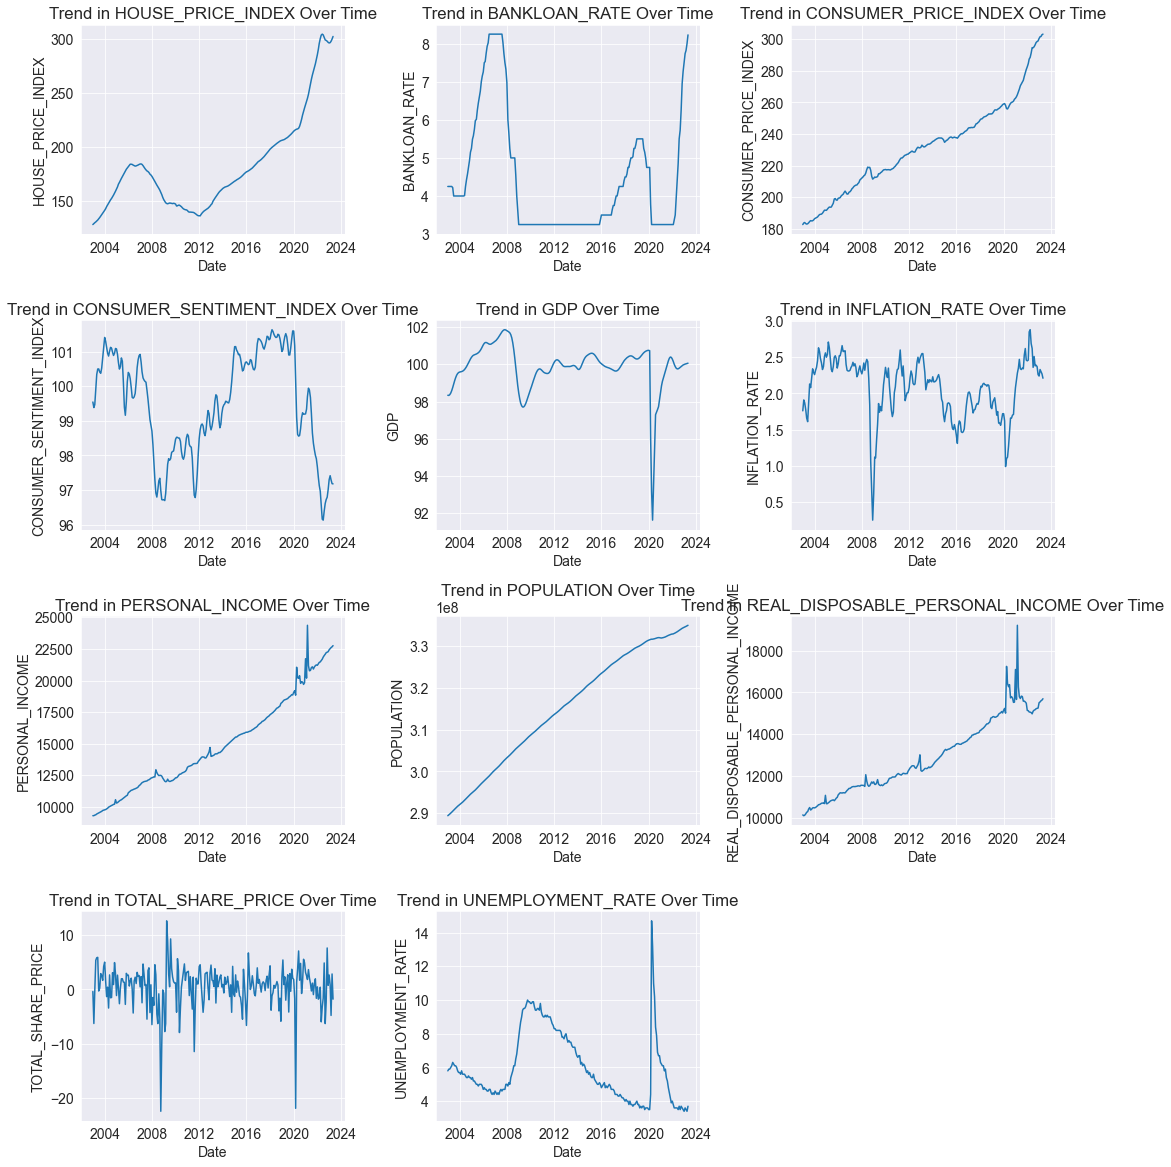

In [273]:
# What is the overall trend in each variable over time?

variables_to_analyze = [
    'HOUSE_PRICE_INDEX', 'BANKLOAN_RATE',
    'CONSUMER_PRICE_INDEX', 'CONSUMER_SENTIMENT_INDEX', 'GDP',
    'INFLATION_RATE', 'PERSONAL_INCOME', 'POPULATION',
    'REAL_DISPOSABLE_PERSONAL_INCOME', 'TOTAL_SHARE_PRICE',
    'UNEMPLOYMENT_RATE'
]

num_rows = 5  # Number of rows in the grid
num_cols = 3  # Number of columns in the grid
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 20))
fig.subplots_adjust(hspace=0.5)  # Adjust vertical spacing


for i, variable in enumerate(variables_to_analyze):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]

    ax.plot(main_df['DATE'], main_df[variable])
    ax.set_title(f'Trend in {variable} Over Time')
    ax.set_xlabel('Date')
    ax.set_ylabel(variable)
    ax.grid(True)


for i in range(len(variables_to_analyze), num_rows * num_cols):
    row = i // num_cols
    col = i % num_cols
    fig.delaxes(axes[row, col])


plt.tight_layout()
plt.show()

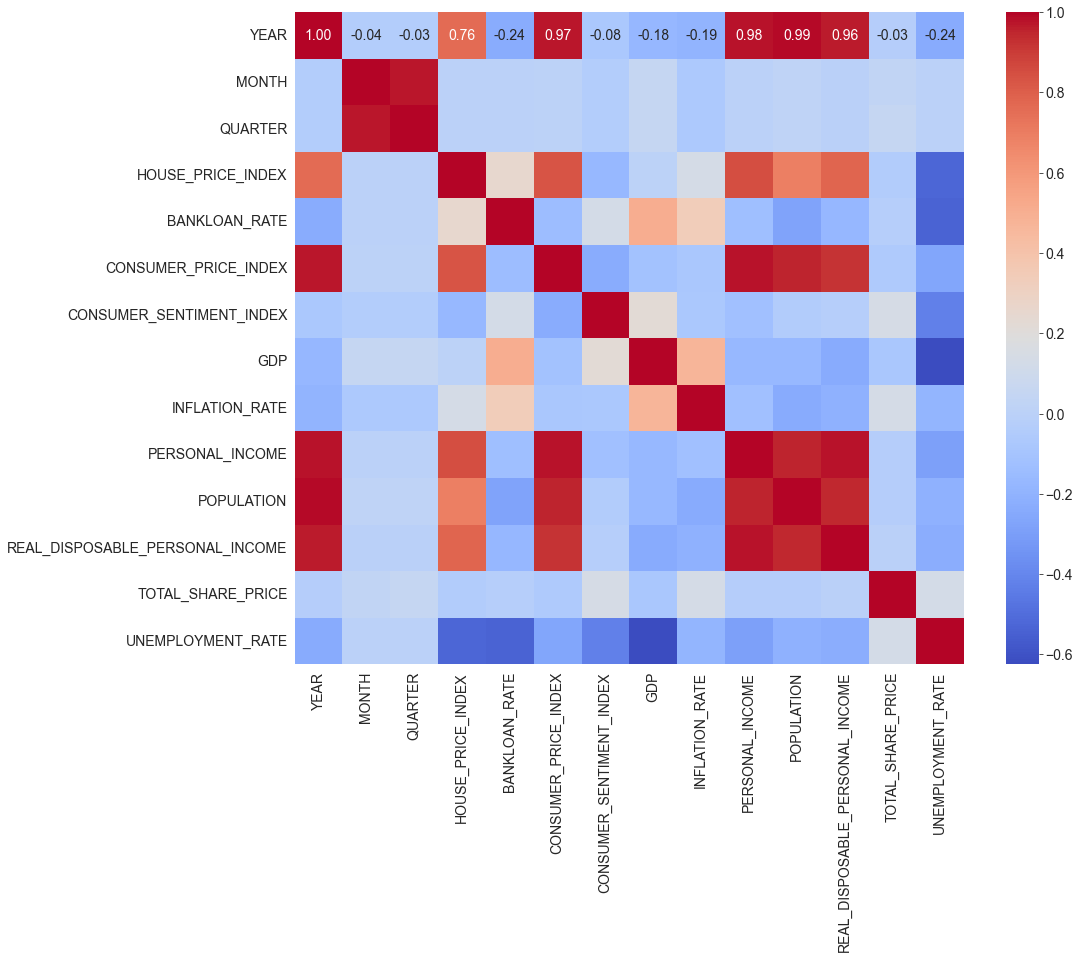

In [274]:
# What is the correlation between various variables?
ax = main_df.corr()
plt.figure(figsize=(15,12))
sns.heatmap(ax, cmap='coolwarm', annot=True, fmt='.2f');


In [275]:
main_df.drop(columns='DATE', inplace=True)

C:\Users\14708\AppData\Local\Temp\ipykernel_31724\3282244712.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_df.drop(columns='DATE', inplace=True)


In [276]:
main_df

,YEAR,MONTH,QUARTER,HOUSE_PRICE_INDEX,BANKLOAN_RATE,CONSUMER_PRICE_INDEX,CONSUMER_SENTIMENT_INDEX,GDP,INFLATION_RATE,PERSONAL_INCOME,POPULATION,REAL_DISPOSABLE_PERSONAL_INCOME,TOTAL_SHARE_PRICE,UNEMPLOYMENT_RATE
0,2003,1,1,128.460,4.25,182.600,99.547162,98.340277,1.76,9297.2,289412000.0,10133.6,-0.368127,5.8
1,2003,2,1,129.355,4.25,183.600,99.386673,98.332993,1.91,9302.0,289606000.0,10097.6,-6.280696,5.9
2,2003,3,1,130.147,4.25,183.900,99.470983,98.371757,1.87,9341.7,289809000.0,10121.5,-0.293998,5.9
3,2003,4,2,130.884,4.25,183.200,99.911101,98.457636,1.78,9369.8,290024000.0,10181.4,5.388649,6.0
4,2003,5,2,131.734,4.25,182.900,100.345019,98.588511,1.66,9431.9,290250000.0,10261.2,5.865718,6.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,2023,1,1,296.601,7.50,300.536,97.299665,99.994540,2.24,22432.0,334533000.0,15504.7,2.671263,3.4
241,2023,2,1,296.958,7.74,301.648,97.414405,100.014996,2.33,22520.6,334637000.0,15545.3,0.830646,3.6
242,2023,3,1,298.210,7.82,301.808,97.292142,100.031746,2.30,22605.1,334753000.0,15598.6,-4.792700,3.5
243,2023,4,2,300.214,8.00,302.918,97.183635,100.047133,2.27,22669.7,334880000.0,15633.0,2.863582,3.4


### Selecting input columns and target columns

In [277]:
input_cols = [
    'YEAR', 'MONTH', 'QUARTER',
    'BANKLOAN_RATE', 'CONSUMER_PRICE_INDEX', 'CONSUMER_SENTIMENT_INDEX',
    'GDP', 'INFLATION_RATE', 'PERSONAL_INCOME', 'POPULATION',
    'REAL_DISPOSABLE_PERSONAL_INCOME', 'TOTAL_SHARE_PRICE',
    'UNEMPLOYMENT_RATE'
    ]

target_col = 'HOUSE_PRICE_INDEX'


### Splitting the data
- Training set
- Validation set
- Test set

In [278]:
train_df = main_df[main_df['YEAR'] < 2018]
val_df = main_df[(main_df['YEAR'] >= 2018) & (main_df['YEAR'] < 2021)]
test_df = main_df[main_df['YEAR'] > 2020]

## Scaling of Features

In [279]:
scaler = StandardScaler()
scaler

StandardScaler()

In [280]:
scaler.fit(main_df[input_cols])

StandardScaler()

In [281]:
main_df[input_cols] = scaler.transform(main_df[input_cols])
main_df[input_cols]

C:\Users\14708\AppData\Local\Temp\ipykernel_31724\3764184152.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_df[input_cols] = scaler.transform(main_df[input_cols])


,YEAR,MONTH,QUARTER,BANKLOAN_RATE,CONSUMER_PRICE_INDEX,CONSUMER_SENTIMENT_INDEX,GDP,INFLATION_RATE,PERSONAL_INCOME,POPULATION,REAL_DISPOSABLE_PERSONAL_INCOME,TOTAL_SHARE_PRICE,UNEMPLOYMENT_RATE
0,-1.647305,-1.569766,-1.319675,-0.136650,-1.686866,0.015749,-1.222459,-0.780822,-1.513008,-1.865131,-1.567453,-0.233116,-0.079040
1,-1.647305,-1.280598,-1.319675,-0.136650,-1.652365,-0.092351,-1.228289,-0.411419,-1.511715,-1.851113,-1.587933,-1.772868,-0.030015
2,-1.647305,-0.991431,-1.319675,-0.136650,-1.642015,-0.035563,-1.197264,-0.509927,-1.501016,-1.836445,-1.574337,-0.213811,-0.030015
3,-1.647305,-0.702264,-0.426525,-0.136650,-1.666166,0.260885,-1.128529,-0.731569,-1.493443,-1.820910,-1.540260,1.266065,0.019010
4,-1.647305,-0.413096,-0.426525,-0.136650,-1.676516,0.553158,-1.023781,-1.027091,-1.476708,-1.804581,-1.494863,1.390304,0.068034
...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,1.744206,-1.569766,-1.319675,1.900177,2.382077,-1.498089,0.101559,0.401267,2.026720,1.395104,1.488101,0.558403,-1.255632
241,1.744206,-1.280598,-1.319675,2.050589,2.420442,-1.420804,0.117930,0.622909,2.050597,1.402619,1.511197,0.079069,-1.157582
242,1.744206,-0.991431,-1.319675,2.100726,2.425962,-1.503156,0.131337,0.549028,2.073370,1.411000,1.541519,-1.385364,-1.206607
243,1.744206,-0.702264,-0.426525,2.213535,2.464259,-1.576243,0.143652,0.475148,2.090779,1.420177,1.561089,0.608487,-1.255632


# Crating INPUTS and Targets for the entire dataset
## Creating input and training variables for train, validation and test sets 

we are creating 4 different input & target sets to understand the impact of independent variables on the dependent variable at a more minute level.
Other than this, I also aim to understand the trend rate in more detail. 

In [282]:
inputs = main_df[input_cols]
target = main_df['HOUSE_PRICE_INDEX']

train_inputs = train_df[input_cols]
train_target = train_df[target_col]

val_inputs = val_df[input_cols]
val_target = val_df[target_col]

test_inputs = test_df[input_cols]
test_target = test_df[target_col]

# Model Building
Includes:
- Training
- Evaluation using validation set
- Interpreting (Coefficients of the model to understand impact of each independent variable) 
- Using visualizations, such as scatter plots, to show the relationships between the actual home prices and the predicted values from my model.


In [283]:
def evaluate(model):
    main_preds = model.predict(inputs)
    main_rmse = mean_squared_error(target, main_preds, squared=False)
    train_preds = model.predict(train_inputs)
    train_rmse = mean_squared_error(train_target, train_preds, squared=False)
    val_preds = model.predict(val_inputs)
    val_rmse = mean_squared_error(val_target, val_preds, squared=False)
    test_preds = model.predict(test_inputs)
    test_rmse = mean_squared_error(test_target, test_preds, squared=False)
    
    main_preds = model.predict(inputs)
    main_mae = mean_absolute_error(target, main_preds)
    train_preds = model.predict(train_inputs)
    train_mae = mean_absolute_error(train_target, train_preds)
    val_preds = model.predict(val_inputs)
    val_mae = mean_absolute_error(val_target, val_preds)
    test_preds = model.predict(test_inputs)
    test_mae = mean_absolute_error(test_target, test_preds)

    main_preds = model.predict(inputs)
    main_r2 = r2_score(target, main_preds)
    train_preds = model.predict(train_inputs)
    train_r2 = r2_score(train_target, train_preds)
    val_preds = model.predict(val_inputs)
    val_r2 = r2_score(val_target, val_preds)
    test_preds = model.predict(test_inputs)
    test_r2 = r2_score(test_target, test_preds)

    print('RMSE(main,train,val,test):', main_rmse, train_rmse, val_rmse, test_rmse)
    print('MAE(main,train,val,test):', main_mae, train_mae, val_mae, test_mae)
    print('r-sqared score(main,train,val,test):', main_r2, train_r2, val_r2, test_r2)

In [284]:
def plot_actual_vs_predicted(model, train_inputs, val_inputs, test_inputs, train_target, val_target, test_target):
    # Make predictions on train, validation, and test sets
    train_pred = model.predict(train_inputs)
    val_pred = model.predict(val_inputs)
    test_pred = model.predict(test_inputs)

    # Calculate the Mean Squared Error for each dataset
    mse_train = mean_squared_error(train_target, train_pred)
    mse_val = mean_squared_error(val_target, val_pred)
    mse_test = mean_squared_error(test_target, test_pred)

    # Create three subplots for train, validation, and test set comparisons
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    # Train Set Comparison
    axes[0].plot(train_target, train_pred, c='blue', marker='o')
    axes[0].set_title(f'Train Set (MSE={mse_train:.2f})')

    # Validation Set Comparison
    axes[1].plot(val_target, val_pred, c='green', marker='x')
    axes[1].set_title(f'Validation Set (MSE={mse_val:.2f})')

    # Test Set Comparison
    axes[2].plot(test_target, test_pred, c='red', marker='s')
    axes[2].set_title(f'Test Set (MSE={mse_test:.2f})')

    for ax in axes:
        ax.plot(ax.get_xlim(), ax.get_xlim(), ls="--", c=".3")  # Add a diagonal line for reference

    plt.tight_layout()
    plt.show()

In [285]:
def plot_predictions_vs_targets(model, inputs, targets, title="Predictions vs. Targets"):

    # Make predictions using the provided model
    predictions = model.predict(inputs)

    # Create an array for x-axis values (data points)
    data_points = np.arange(len(targets))

    # Create a line chart comparing predictions and targets
    plt.figure(figsize=(10, 6))
    plt.plot(data_points, targets, label="Actual", marker='o')
    plt.plot(data_points, predictions, label="Predicted", marker='x')
    plt.xlabel("Data Points")
    plt.ylabel("Values")
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

### 1. Regression:
- Linear Regression
- Lasso
- Ridge

In [286]:
# Linear Regression
lr =  LinearRegression().fit(inputs, target)
evaluate(lr)


RMSE(main,train,val,test): 7.195931410834998 32129923766.993294 34296672807.239616 34599075822.29993
MAE(main,train,val,test): 5.648684828787584 32108689591.371193 34296404728.240253 34598931318.077286
r-sqared score(main,train,val,test): 0.9733135096113151 -3.2065745681158733e+18 -1.348012498542697e+19 -2.6582784236322714e+18


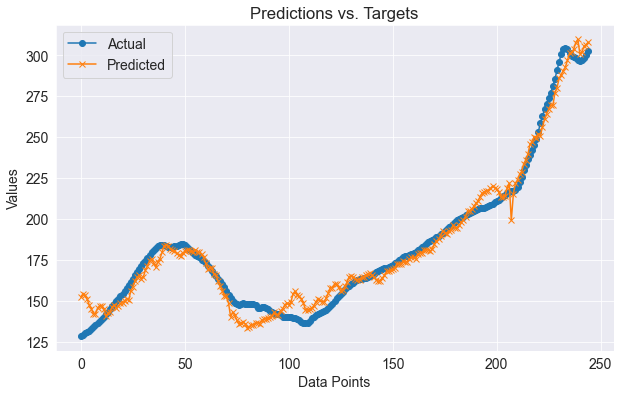

In [287]:
plot_predictions_vs_targets(lr, inputs, target, title="Predictions vs. Targets")

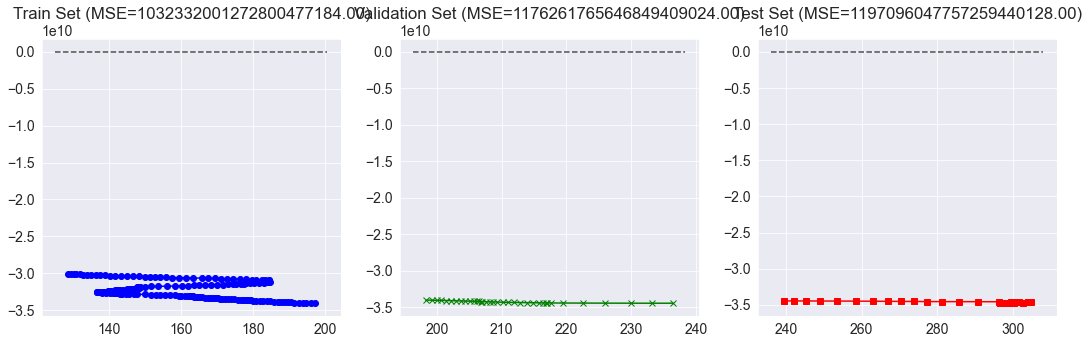

In [288]:
plot_actual_vs_predicted(lr, train_inputs, val_inputs, test_inputs, train_target, val_target, test_target)

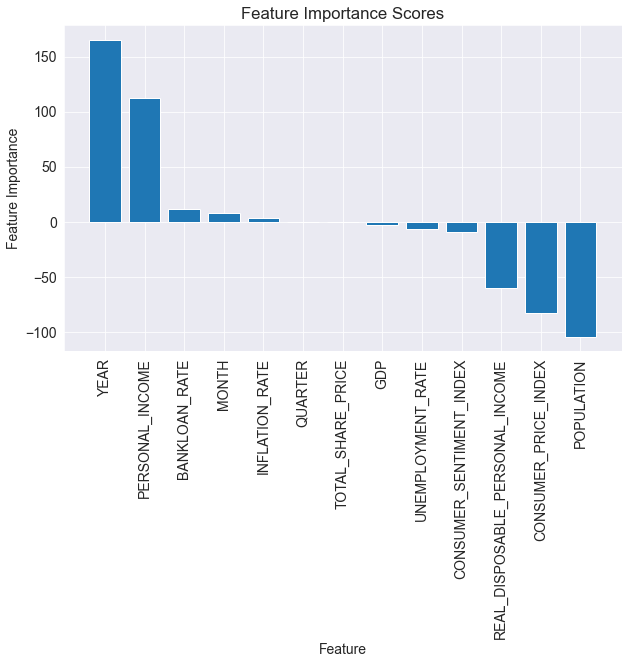

In [289]:
# Feature Importance

feature_importance = lr.coef_

sorted_idx = np.argsort(feature_importance)[::-1]

feature_names = train_inputs.columns  

plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importance)), feature_importance[sorted_idx], align='center')
plt.xticks(range(len(feature_importance)), feature_names[sorted_idx], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Feature Importance')
plt.title('Feature Importance Scores')
plt.show()

In [290]:
# ridge regression
ridge = Ridge(random_state=42).fit(inputs, target)
evaluate(ridge)

RMSE(main,train,val,test): 8.897325587616415 9332452344.076963 9961738329.322134 10049551366.425146
MAE(main,train,val,test): 7.159479399291175 9326285441.29665 9961660517.970503 10049509379.582504
r-sqared score(main,train,val,test): 0.9592022324880556 -2.7052880574182893e+17 -1.1372611351110509e+18 -2.2426671310342186e+17


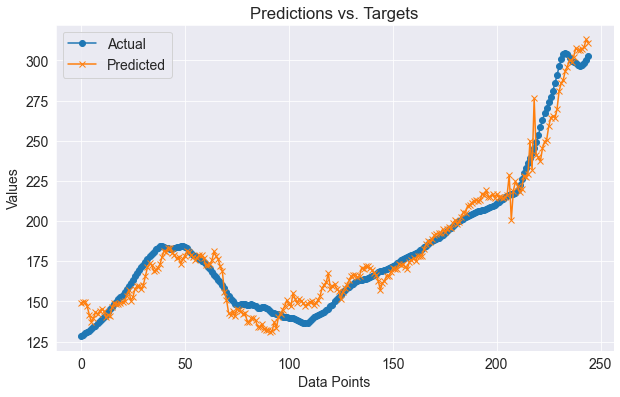

In [291]:
plot_predictions_vs_targets(ridge, inputs, target, title="Predictions vs. Targets")

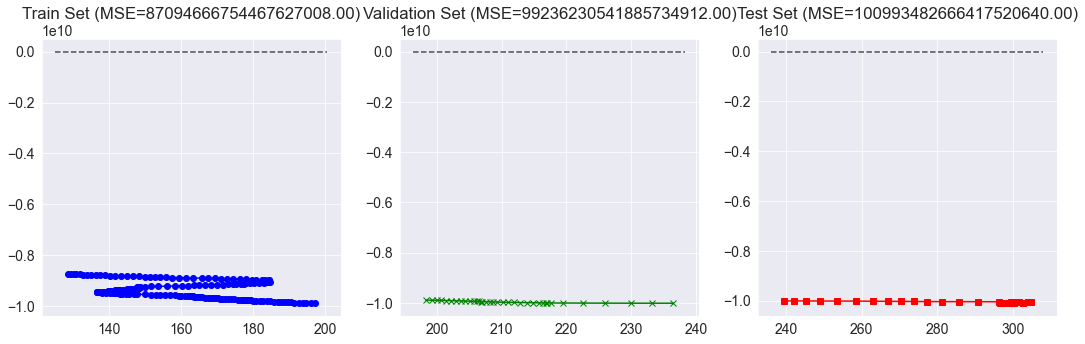

In [292]:
plot_actual_vs_predicted(ridge, train_inputs, val_inputs, test_inputs, train_target, val_target, test_target)

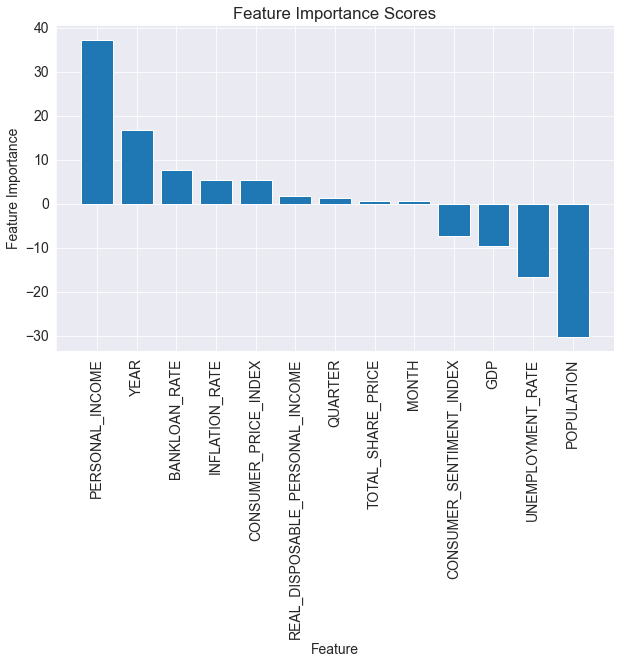

In [293]:
# Feature Importance

feature_importance = ridge.coef_

sorted_idx = np.argsort(feature_importance)[::-1]

feature_names = train_inputs.columns  

plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importance)), feature_importance[sorted_idx], align='center')
plt.xticks(range(len(feature_importance)), feature_names[sorted_idx], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Feature Importance')
plt.title('Feature Importance Scores')
plt.show()

In [294]:
# lasso regression
lasso = Lasso(random_state=42).fit(inputs, target)
evaluate(lasso)

RMSE(main,train,val,test): 10.59688617057282 411732.7247735982 583240.8328913433 677210.054783912
MAE(main,train,val,test): 8.485984695937212 406161.8386578631 582468.4391629664 676726.0346307243
r-sqared score(main,train,val,test): 0.9421272698715533 -526565893.1304501 -3898394460.4749627 -1018399703.2437952


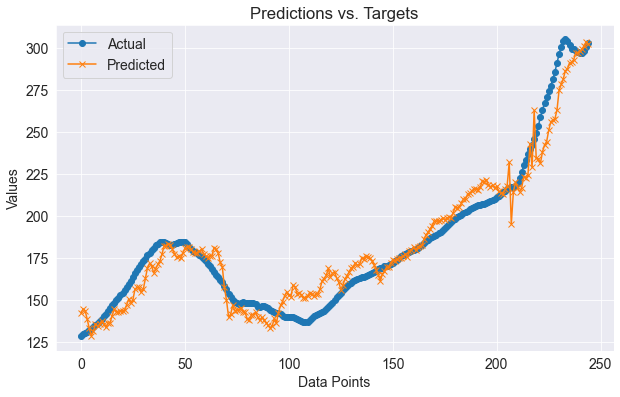

In [295]:
plot_predictions_vs_targets(lasso, inputs, target, title="Predictions vs. Targets")

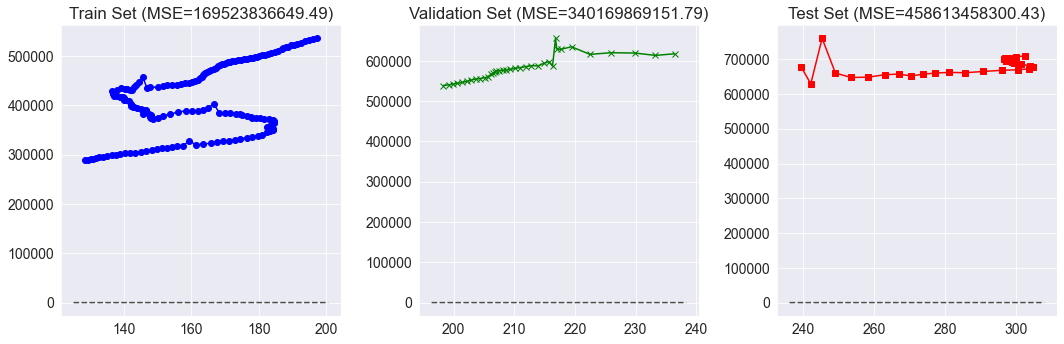

In [296]:
plot_actual_vs_predicted(lasso, train_inputs, val_inputs, test_inputs, train_target, val_target, test_target)

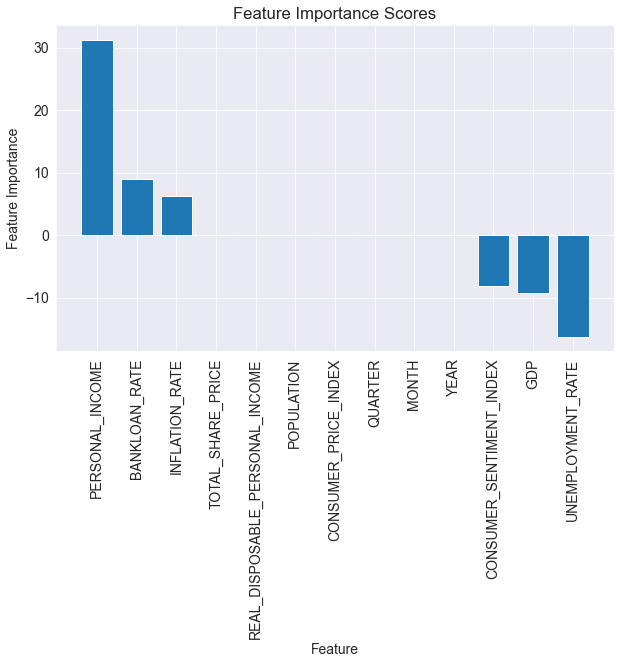

In [297]:
# Feature Importance

feature_importance = lasso.coef_

sorted_idx = np.argsort(feature_importance)[::-1]

feature_names = train_inputs.columns  

plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importance)), feature_importance[sorted_idx], align='center')
plt.xticks(range(len(feature_importance)), feature_names[sorted_idx], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Feature Importance')
plt.title('Feature Importance Scores')
plt.show()

### Elastic Net

In [298]:
en = ElasticNet(random_state=42).fit(inputs, target)
evaluate(en)

RMSE(main,train,val,test): 15.772866633033455 614543162.6971492 656051991.7453803 661871671.6072232
MAE(main,train,val,test): 12.340022994337481 614136220.5059272 656046815.1110387 661868900.6349205
r-sqared score(main,train,val,test): 0.8717850420187055 -1173077583380981.5 -4932492744107204.0 -972789907614943.8


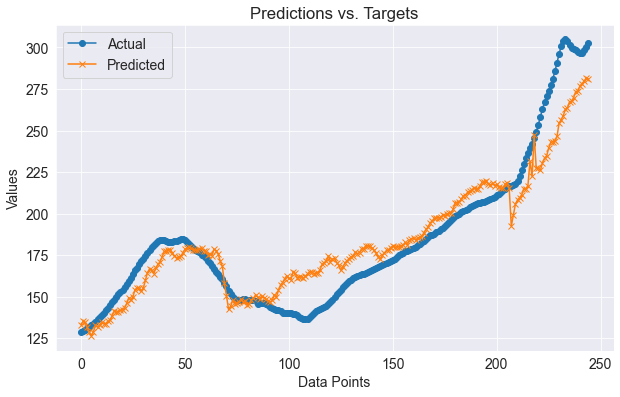

In [299]:
plot_predictions_vs_targets(en, inputs, target, title="Predictions vs. Targets")

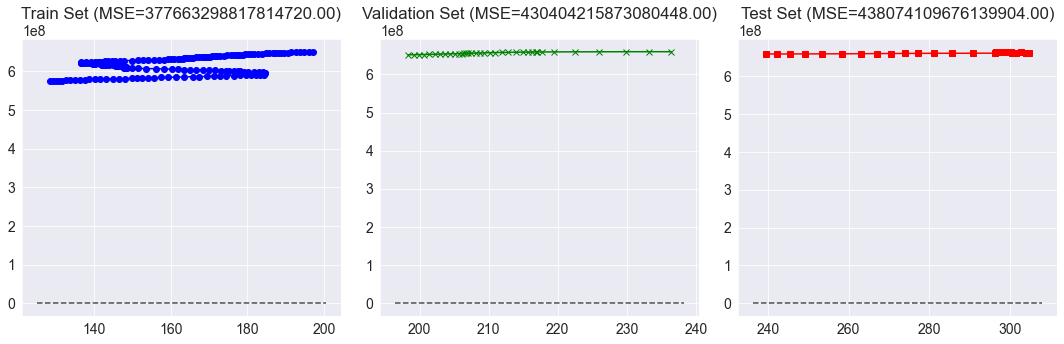

In [300]:
plot_actual_vs_predicted(en, train_inputs, val_inputs, test_inputs, train_target, val_target, test_target)

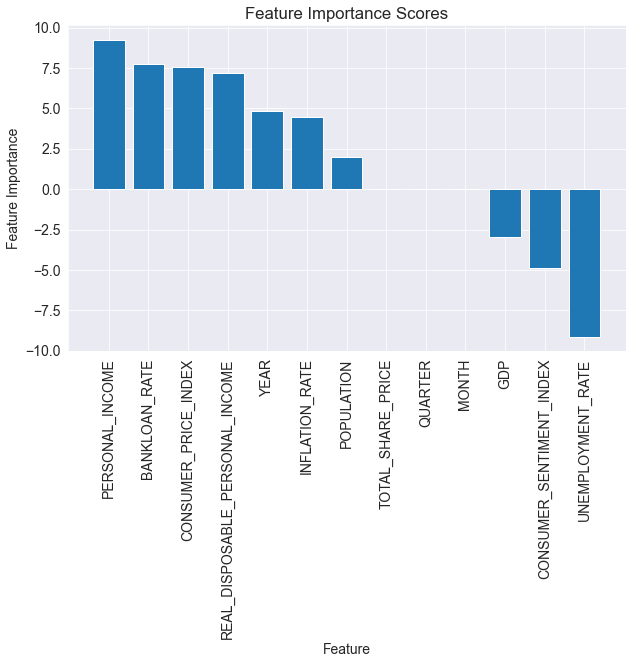

In [301]:
# Feature Importance

feature_importance = en.coef_

sorted_idx = np.argsort(feature_importance)[::-1]

feature_names = train_inputs.columns  

plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importance)), feature_importance[sorted_idx], align='center')
plt.xticks(range(len(feature_importance)), feature_names[sorted_idx], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Feature Importance')
plt.title('Feature Importance Scores')
plt.show()

### Random Forest Regressor

In [302]:
rfr = RandomForestRegressor(random_state=42).fit(inputs, target)
evaluate(rfr)

RMSE(main,train,val,test): 0.653710133209238 119.58186358367364 68.88087146228274 21.286570531036634
MAE(main,train,val,test): 0.42160000000001485 118.22504849999994 68.23311083333328 19.191469310344853
r-sqared score(main,train,val,test): 0.9997797642254259 -43.41734423805186 -53.373489390239435 -0.006196646373863857


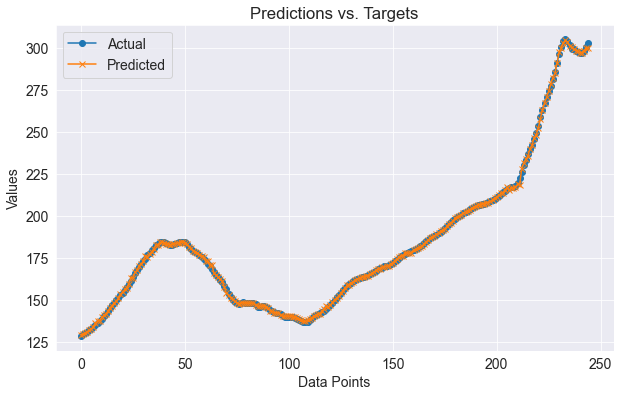

In [303]:
plot_predictions_vs_targets(rfr, inputs, target, title="Predictions vs. Targets")

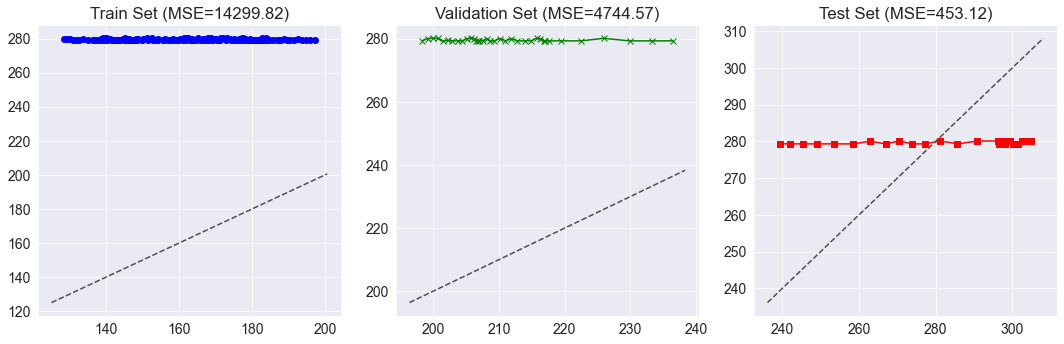

In [304]:
plot_actual_vs_predicted(rfr, train_inputs, val_inputs, test_inputs, train_target, val_target, test_target)

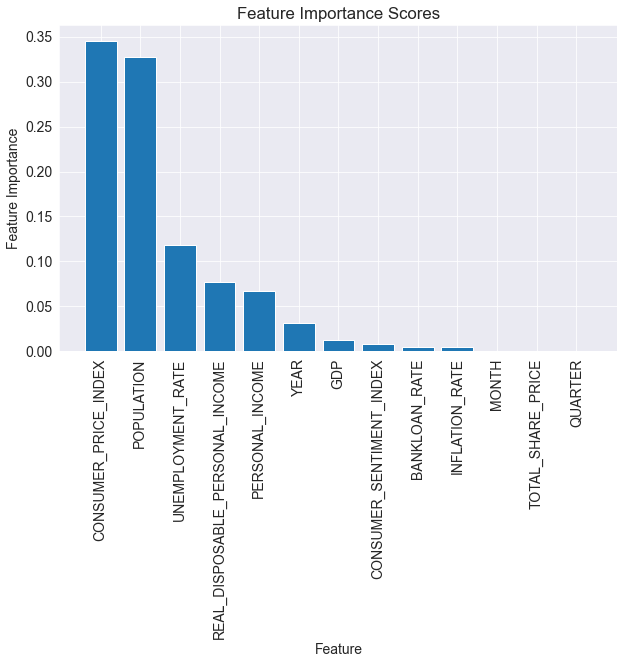

In [305]:
# Feature Importance

feature_importance = rfr.feature_importances_

sorted_idx = np.argsort(feature_importance)[::-1]

feature_names = train_inputs.columns  

plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importance)), feature_importance[sorted_idx], align='center')
plt.xticks(range(len(feature_importance)), feature_names[sorted_idx], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Feature Importance')
plt.title('Feature Importance Scores')
plt.show()

### XGB Regressor

In [306]:
xgb = XGBRegressor().fit(inputs, target)
evaluate(xgb)

RMSE(main,train,val,test): 0.009006207493028502 128.09169703000475 77.39526325778702 21.92150613366352
MAE(main,train,val,test): 0.00641288066007795 126.82862675238717 76.83034409586588 17.904678163725755
r-sqared score(main,train,val,test): 0.9999999581975892 -49.96404757617918 -67.64654785848141 -0.06711751458193493


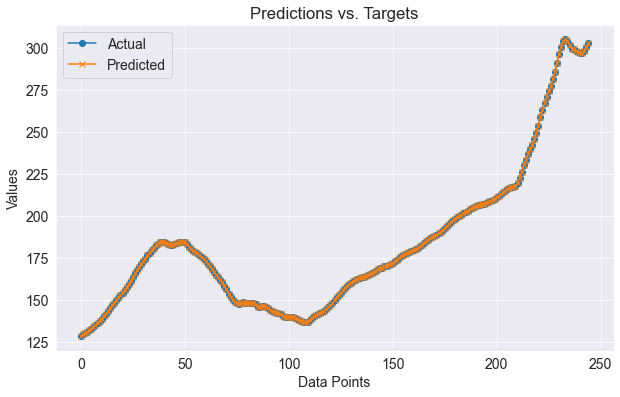

In [307]:
plot_predictions_vs_targets(xgb, inputs, target, title="Predictions vs. Targets")

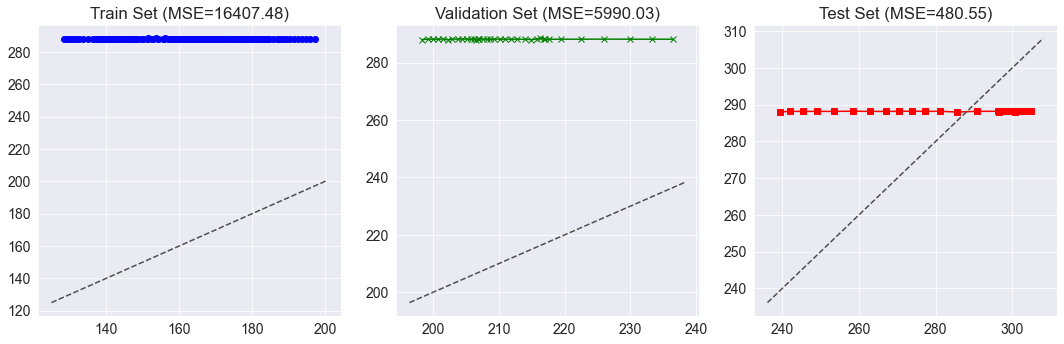

In [308]:
plot_actual_vs_predicted(xgb, train_inputs, val_inputs, test_inputs, train_target, val_target, test_target)

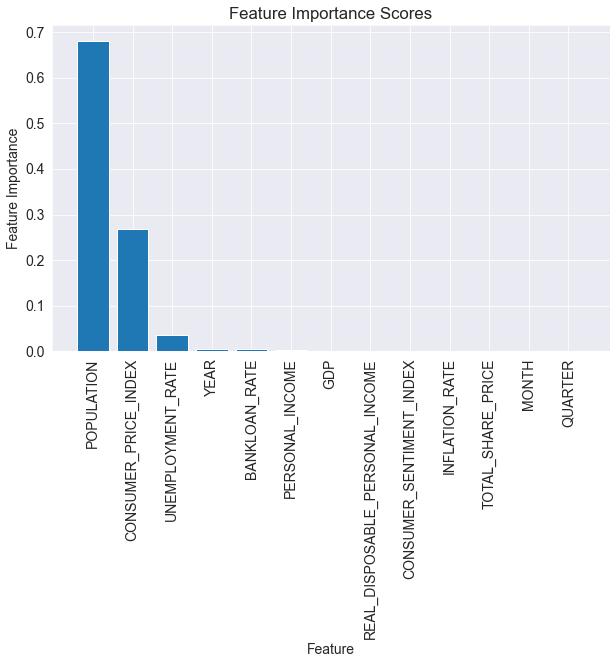

In [309]:
# Feature Importance

feature_importance = xgb.feature_importances_

sorted_idx = np.argsort(feature_importance)[::-1]

feature_names = train_inputs.columns  

plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importance)), feature_importance[sorted_idx], align='center')
plt.xticks(range(len(feature_importance)), feature_names[sorted_idx], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Feature Importance')
plt.title('Feature Importance Scores')
plt.show()